<a href="https://colab.research.google.com/github/othoni-hub/ECG2/blob/main/Ch09_TD_Ex6_UrneErhenfest.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **CPGE-ECG2** 
<img src="https://drive.google.com/uc?id=12Wo3LubGGT4qOvYFAuLP4CyCuwjKNVuk" width="230" height="150" align = "right"/>

## **Ch09 - Notebook : Graphes probabilistes - Chaînes de Markov**
## **Exercices du TD : Ex n°6 : Urne d'Ehrenfest**




**O.Thöni - Lycée Saint-Charles Sainte Croix - LE MANS**

## **Exercice 6 :**

Ce modèle simplifié de diffusion d'un gaz à travers une membrane poreuse fut proposé en 1907 par les physiciens autrichiens Tatiana et Paul Ehrenfest pour décrire en termes de physique statistique les échanges de chaleur entre deux systèmes portés initialement à une température différente. 

Il permit ainsi de mieux comprendre le phénomène thermodynamique.

Le but est de modéliser la répartition au cours du temps de N molécules de gaz à l'intérieur d'un récipient divisé en deux compartiments séparés par une membrane poreuse.

On modélise mathématiquement par l'expérience aléatoire suivante.

« On considère 2 urnes A et B, et N boules numérotées de 1 a N.
Initialement, toutes les boules se trouvent dans l'urne A. Ensuite, aux étapes 1, 2, 3,... on tire au hasard, de façon équiprobable, un nombre entre 1 et N, et on change d'urne la boule correspondante. »

<img src="https://i.makeagif.com/media/3-07-2018/2xTO3w.gif" width="280" height="150" align = "center"/>

**Modélisation informatique**

Si l'on nomme N le nombre de boules, le contenu des urnes va être modélisé par deux listes de N éléments, le k-ième prenant pour valeur 1 si la boule n°k est dans l'urne en question, 0 sinon.

On va simuler le tirage au sort du numéro de la boule, puis son changement d'urne.

In [ ]:
import numpy as np
import numpy.random as rd
import matplotlib.pyplot as plt

In [ ]:
def initialiser(N) :
    global A, B, X

    A = np.ones(N, int) # contenu de l'urne A : k-ième valeur == 1 : boule n°k présente dans l'urne
    B = 1 - A

    X = [np.sum(B)] # liste évolutive donnant le nombre de boules dans l'urne B


In [ ]:
def tirages(n):
    global A, B, X
    
    for k in range(1,n+1) :
        # tirage uniforme du numéro de la boule qui change d'urne
        numero = rd.randint(1,N+1)

        # La boule "numero" change d'urne
        A[numero - 1] = 1 - A[numero - 1]
        B[numero - 1] = 1 - B[numero - 1] # 0 s'il y avait 1, 1 s'il y avait 0

        # Comptage des boules dans B
        X = X + [np.sum(B)]
        #print(X)

    

In [ ]:
def graphique():
    global A, B, X

    k = range(n+1)
    plt.step(k,X, color = "red") # fonction en escalier

    plt.xlabel('Époques')
    plt.ylabel("Nombre de boules dans l'urne B")
    plt.title("Urne d'Ehrenfest à " + str(N) + " boules : évolution de l'urne B au cours du temps")
    plt.show()

**Tests**

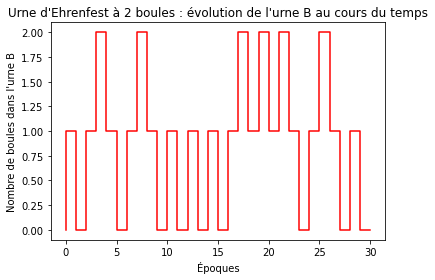

In [ ]:
N = 2
n = 30
initialiser(N)     # paramètre : nombre de boules
tirages(n)         # paramètre : nombre de tirages
graphique()

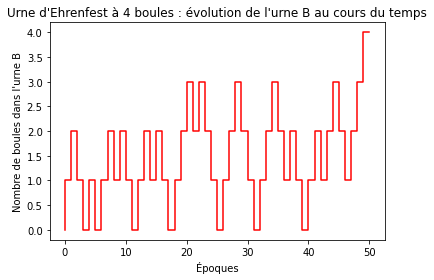

In [ ]:
N = 4
n = 50
initialiser(N)     # paramètre : nombre de boules
tirages(n)         # paramètre : nombre de tirages
graphique()

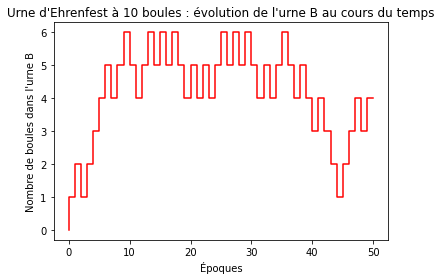

In [ ]:
N = 10
n = 50
initialiser(N)     # paramètre : nombre de boules
tirages(n)         # paramètre : nombre de tirages
graphique()

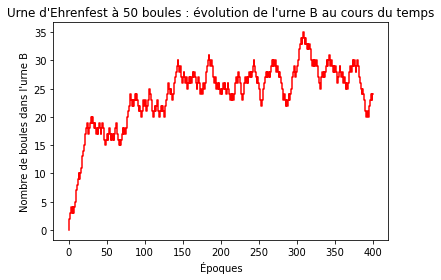

In [ ]:
N = 50
n = 400
initialiser(N)     # paramètre : nombre de boules
tirages(n)         # paramètre : nombre de tirages
graphique()